In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from scipy.optimize import curve_fit as cf
import scipy.stats as stats

In [2]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 15
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [3]:
from math import floor

dcmls = lambda x : -int(floor(np.log10(abs(x))))

round_error = lambda value,rounder : np.round(value,dcmls(rounder))

def chi2(y,y_err,x,func,popt):
    y_ajuste = func(x,*popt)
    chi_cuadrado = np.sum(((y-y_ajuste)/y_err)**2)
    return chi_cuadrado

def pvalue(y,y_err,x,func,popt):
    chi_cuadrado = chi2(y,y_err,x,func,popt)
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    pvalor = stats.chi2.sf(chi_cuadrado,grados_lib)
    return pvalor

In [4]:
from trackerclass import tracker_in_video
import matplotlib.pyplot as plt
import numpy as np
from math import ceil
import cv2
import imageio.v3 as imageio

In [5]:
print(os.listdir('videos pinzas/slow'))

['0,005.avi', 'pinza4 0,005.avi', 'Pinza_2.avi']


In [6]:
def one_shot_particula(file,initial_time,final_time,save_dir,particle_n,window=[60, 60],flip=False):
    videoName = f'{file}.avi'
    track = tracker_in_video(videoName)
    fps = track.fps

    initialTime = 0    #seconds
    trackerDuration = final_time-initial_time #seconds

    n0, l = int(fps*initialTime), int(fps*trackerDuration)
    duration = [n0, n0+l]

    #INITIAL IMAGE
    #width  xy of observation area. The default observation area is [40, 40].
    track.observationWidth = window #px

    #DEFINE INITIAL TEMPLATE (black) AND OBSERVATION AREA (red) WITH A SELECTION BOX.
    track.initialConditionsSelecBox(n0)

    #TRACK WITH CORRELATION METHOD
    timeSleep = 1 #ms
    x_corr, y_corr = track.corr(timeSleep, duration)

    #SAVE DATA
    np.savetxt(f'{save_dir}/{particle_n}_tray.txt', np.transpose([x_corr, y_corr]),
               header = 'frames %s, center=%s, duration=%s, video=%s'%(len(x_corr), track.initialCenter, duration, file))

def n_steps_particula(file,n_steps,total_duration,save_dir,particle_n,window=[60,60],flip=False,t_i=0):
    videoName = f'{file}.avi'
    track = tracker_in_video(videoName)
    fps = track.fps
    total_frames = total_duration*fps
    single_duration = n_steps/fps

    for i in range(int(total_frames//n_steps)):
        initialTime = t_i + single_duration*i    #seconds
        trackerDuration = single_duration #seconds

        n0, l = int(fps*initialTime), int(fps*trackerDuration)
        duration = [n0, n0+l]

        #INITIAL IMAGE
        #width  xy of observation area. The default observation area is [40, 40].
        track.observationWidth = window#px

        #DEFINE INITIAL TEMPLATE (black) AND OBSERVATION AREA (red) WITH A SELECTION BOX.
        track.initialConditionsSelecBox(n0,flip)

        #TRACK WITH CORRELATION METHOD
        timeSleep = 1 #ms
        x_corr, y_corr = track.corr(timeSleep, duration,flip)

        #SAVE DATA
        np.savetxt(f'{save_dir}/{particle_n}_tray_{i}.txt', np.transpose([x_corr, y_corr]),
                   header = 'frames %s, center=%s, duration=%s, video=%s'%(len(x_corr), track.initialCenter, duration, file))

In [7]:
def extract_frame(video_path,t):
    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES,int(t*15.001))
    ret, frame = cap.read()
    if ret:
        res = frame
    else:
        print("Error: Could not read the frame.")
        res = None
    return res

In [10]:
video = 'Calibracion_0'
foto = extract_frame(f'videos browniano 1/{video}.avi',0)
cv2.imwrite('first.jpg',foto)

True

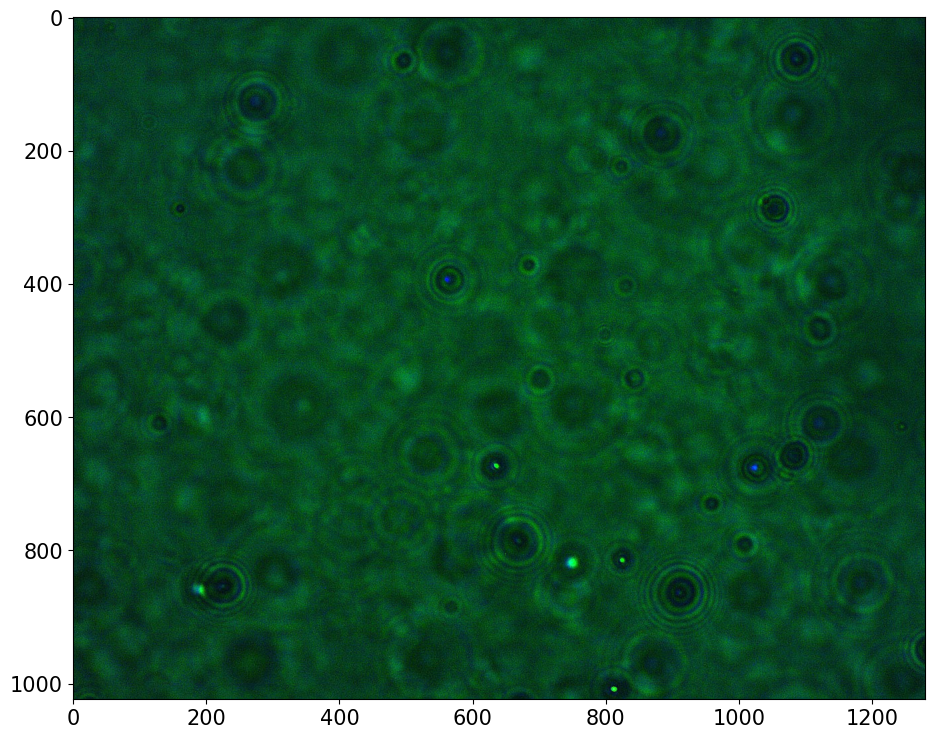

In [11]:
imagen = imageio.imread('first.jpg')

coords_taken = [
    
                ]

plt.figure(figsize=(9.6,12))
plt.imshow(imagen)#,origin='lower')
for i in range(len(coords_taken)):
    plt.scatter(*coords_taken[i],c='crimson')
    plt.text(*coords_taken[i],str(i+13),c='crimson')
#plt.savefig(f'partículas/{video}.png')

In [13]:
#video = 'video browniano 1_0'
n_steps_particula(f'videos browniano 1/{video}',100,210/15,f'trayectorias/browniano 1/{video}',24,window=[40,40])#,flip=True)

The video has been opened
fps 15.001 frames 267.0
Template and ROI were defined
Tracker in progress
Tracker ended
Template and ROI were defined
Tracker in progress
Tracker ended


In [286]:
total = 0
for j in range(1,11):
    for i in range(6):
        data = np.loadtxt(f'trayectorias/browniano 1/video browniano 1_0/{j}_tray_{i}.txt',skiprows=0,unpack=True)
        if data.shape[1] == 101:
            total += 1
for j in range(11,13):
    for i in range(5):
        data = np.loadtxt(f'trayectorias/browniano 1/Browniano/{j}_tray_{i}.txt',skiprows=0,unpack=True)
        if data.shape[1] == 101:
            total += 1
for j in range(13,24):
    for i in range(5):
        data = np.loadtxt(f'trayectorias/browniano 1/Browniano_0/{j}_tray_{i}.txt',skiprows=0,unpack=True)
        if data.shape[1] == 101:
            total += 1
print(total)

120
